# Homicide data in Mexico and the United States
## A comparison of violent crime in Mexico and the United States

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To begin, let's look at the trends of violent crimes between the United States and Mexico over the past 2 decades.

In [2]:
#In this cell, we will pull the data from Mex_data.csv and turn it into a list of lists and separate the header.
with open('Mex_data.csv') as mex:
    mex_crime_data = [x.strip().split(",") for x in mex.readlines()]
    mex_header = mex_crime_data[0]

In [3]:
#We need to convert the data from strings to numbers and round them to remove the decimal points.
def convert_to_num(values):
    return [round(float(v)) for v in values]

In [4]:
mex_crime_data = [convert_to_num(row) for row in mex_crime_data[1:]]

In [5]:
#Now let's turn the data into a dictionary to make it easier to access.
mex_types = {}
for i in range(len(mex_header)):
    mex_types[mex_header[i]]=[val[i] for val in mex_crime_data]

In [6]:
#Let's do the same thing with the US data.
with open('US_data.csv') as us:
    us_crime_data = [x.strip().split(',') for x in us.readlines()]
    us_header = us_crime_data[0]

In [7]:
us_crime_data = [convert_to_num(row) for row in us_crime_data[1:]]

In [8]:
us_types = {}
for i in range(len(us_header)):
    us_types[us_header[i]] = [val[i] for val in us_crime_data]

In [9]:
# We need to make a list of the years to use as the X-axis for our graphs.
years = []
for x in us_types['Year']:
    years.append(x)

In [10]:
# This is a cell containing all the variables we will need to use on the charts.
x_vals = mex_types['Year']
us_violent_crime_y_vals = us_types['Violent Crime rate']
mex_violent_crime_y_vals = mex_types['Violent crime rate']
us_homicide_y_vals = us_types['Homicide rate']
mex_homicide_y_vals = mex_types['Murder and nonnegligent manslaughter rate']
us_rape_y_vals = us_types['Rape rate']
mex_rape_y_vals = mex_types['Rape rate']
us_assault_y_vals = us_types["Assault rate"]
mex_assault_y_vals = mex_types["Assault rate"]

Now that the data has been prepared, let's look at how all violent crimes have trended in Mexico for the past 20 years!

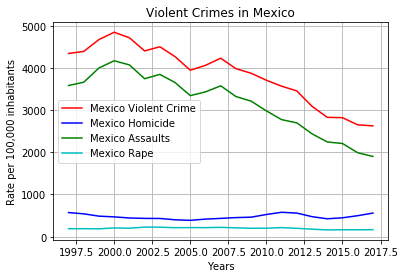

In [11]:
plt.title('Violent Crimes in Mexico')
plt.xlabel("Years")
plt.ylabel("Rate per 100,000 inhabitants")
plt.plot(x_vals, mex_violent_crime_y_vals, color = 'red', label = 'Mexico Violent Crime')
plt.plot(x_vals, mex_homicide_y_vals, color = 'b', label = 'Mexico Homicide')
plt.plot(x_vals, mex_assault_y_vals, color = 'g', label = 'Mexico Assaults')
plt.plot(x_vals, mex_rape_y_vals, color = 'c', label = 'Mexico Rape')
plt.plot
plt.grid(True)
plt.legend()
plt.show()

As you can see, violent crime as a whole has gone down especially in the past 10 years. 

##Now let's see how the US fares.

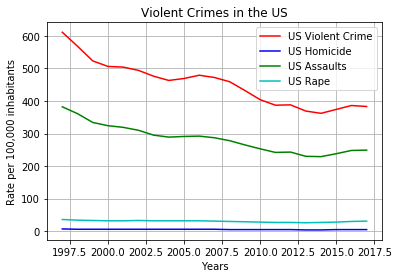

In [12]:
plt.title('Violent Crimes in the US')
plt.xlabel("Years")
plt.ylabel("Rate per 100,000 inhabitants")
plt.plot(x_vals, us_violent_crime_y_vals, color = 'red', label = 'US Violent Crime')
plt.plot(x_vals, us_homicide_y_vals, color = 'b', label = 'US Homicide')
plt.plot(x_vals, us_assault_y_vals, color = 'g', label = 'US Assaults')
plt.plot(x_vals, us_rape_y_vals, color = 'c', label = 'US Rape')
plt.plot
plt.grid(True)
plt.legend()
plt.show()

Violent crime has been on a downward trend for the past 20 years with a slight increase in the past few years

Now let's compare how assaults have changed in the US Vs. Mexico.

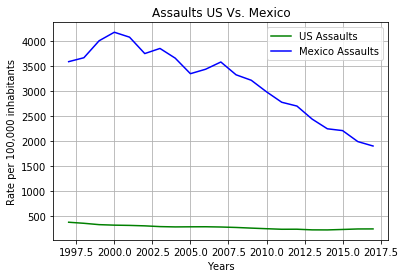

In [13]:
plt.title('Assaults US Vs. Mexico')
plt.xlabel("Years")
plt.ylabel("Rate per 100,000 inhabitants")
plt.plot(x_vals, us_assault_y_vals, color = 'g', label = 'US Assaults')
plt.plot(x_vals, mex_assault_y_vals, color = 'b', label = 'Mexico Assaults')
plt.plot
plt.grid(True)
plt.legend()
plt.show()

While the US has been consistently lower during this time frame, it is good to see that assaults have been going down in Mexico lately.

How do sexual crimes compare between the two countries?

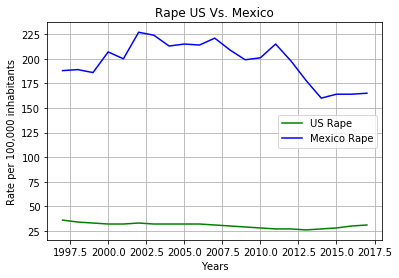

In [14]:
plt.title('Rape US Vs. Mexico')
plt.xlabel("Years")
plt.ylabel("Rate per 100,000 inhabitants")
plt.plot(x_vals, us_rape_y_vals, color = 'g', label = 'US Rape')
plt.plot(x_vals, mex_rape_y_vals, color = 'b', label = 'Mexico Rape')
plt.plot
plt.grid(True)
plt.legend()
plt.show()

Again we see that the US has a lower rate of sexual crimes and is going down in Mexico although not as much as assaults are.

Let's look at homicides.

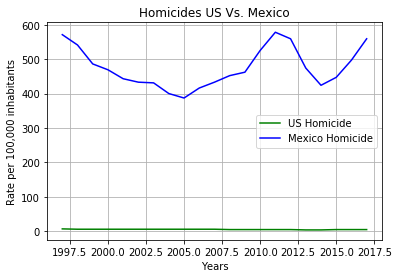

In [15]:
plt.title('Homicides US Vs. Mexico')
plt.xlabel("Years")
plt.ylabel("Rate per 100,000 inhabitants")
plt.plot(x_vals, us_homicide_y_vals, color = 'g', label = 'US Homicide')
plt.plot(x_vals, mex_homicide_y_vals, color = 'b', label = 'Mexico Homicide')
plt.plot
plt.grid(True)
plt.legend()
plt.show()

Like the trends before, the US has siginificantly lower rates but it seems that the murder rates have spiked recently in Mexico over the past few years. Let's see if we can dig into that statistic a little more.

## *A comparison of homicides by weapon*

First, let us compare the homicide data by weapon type to observe any trends over the decade of 2007 - 2017:

In [16]:
#First, let's create a timeline for Mexico's homicides from 2007-2017 by weapon type using a line chart, 
#one line for each type

with open('homicidios_armas_timeline.csv') as armas:
    # To get rid of the odd '\ufeff' as well as the typical '\n.' we will strip and replace to clean the values
    armas_data = [x.strip().replace('\ufeff','').split(",") for x in armas.readlines()]
    armas_headers = armas_data[0]


In [17]:
# The numbers are strings, so we need to convert them to numeric values, in this case integers

def convert_to_ints(values):
    return [int(v) for v in values]

In [18]:
armas_data = [convert_to_ints(row) for row in armas_data[1:]]

# Currently, we have more years than needed - we only want a decade. Let's get rid of the unnecessary years.

timeline = []
for year in armas_data:
    if year[0] >= 2007:
        timeline.append(year)

In [19]:
# Let's create a dictionary so we can pull the values we want for each line in our line chart

types = {}

for i in range(len(armas_headers)):
    types[armas_headers[i]] = [val[i] for val in timeline]


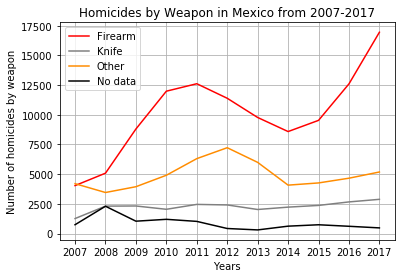

In [20]:
# Now we can plot!

x_vals = types['Year']
firearm_y_vals = types['Firearm']
knife_y_vals = types['Knife']
other_y_vals = types['Other']
nd_y_vals = types['No data']

plt.title('Homicides by Weapon in Mexico from 2007-2017')
plt.xlabel("Years")
plt.ylabel("Number of homicides by weapon")
# Showing all the years as labels is just a personal preference
plt.xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.plot(x_vals, firearm_y_vals, color='red', label='Firearm')
plt.plot(x_vals, knife_y_vals, color='gray', label='Knife')
plt.plot(x_vals, other_y_vals, color='darkorange', label='Other')
plt.plot(x_vals, nd_y_vals, color='black', label='No data')
plt.grid(True)
plt.legend()
plt.show()

### What does this graph show us?

Clearly, homicides in Mexico are mostly committed by firearm, which is not too surprising given the wider range of a firearm, and thus its higher effectiveness. Every weapon type other than *no data* has seen a rise, especially firearm homicides, which is no surprise either given the current issues of police corruption and resulting [security privatization](https://www.reuters.com/article/us-mexico-security/mexico-private-security-boom-adds-to-corruption-use-of-force-study-idUSKBN1H339B), as well as the prevalence of [gang/cartel activity](https://www.theguardian.com/world/2018/jul/23/mexico-crime-homicides-violence-up-report) throughout the country. 

However, the slight decline in *no data* records may indicate that data collection practices are becoming more precise and thus more robust, which is a great step towards measuring and counteracting Mexico's longstanding issue with violence and instability.

## Now, the United States

Let's recreate the same graph to observe the development of homicides by weapon in the United States.

In [21]:
# Here I quickly replicate most of what I have already done for the Mexican data

types_usa = {}
with open('homicide-by-weapon-decade-US.csv') as hom:
    hom_data = [x.strip().replace('\ufeff', '').split(',') for x in hom.readlines()]
    hom_headers = [x[0] for x in hom_data]
    hom_vals = [x[1:] for x in hom_data]
    hom_vals = [convert_to_ints(row) for row in hom_vals]
    
    for i in range(len(hom_headers)):
        types_usa[hom_headers[i]] = hom_vals[i]

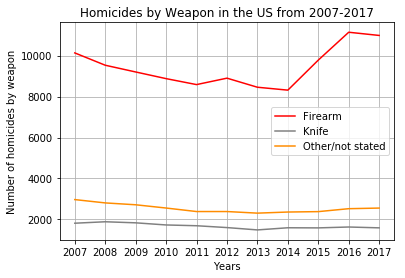

In [22]:
# Time to plot

x_vals = types_usa['Year']
firearm_y_vals = types_usa['Firearm']
knife_y_vals = types_usa['Knife']
other_y_vals = types_usa['Other/not stated']

plt.title('Homicides by Weapon in the US from 2007-2017')
plt.xlabel("Years")
plt.ylabel("Number of homicides by weapon")

plt.xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.plot(x_vals, firearm_y_vals, color='red', label='Firearm')
plt.plot(x_vals, knife_y_vals, color='gray', label='Knife')
plt.plot(x_vals, other_y_vals, color='darkorange', label='Other/not stated')
plt.grid(True)
plt.legend()
plt.show()

### What does this graph show us?

Clearly, firearms are once again the most used in a homicide, but the disparity here is much higher than in Mexico consistently throughout the decade. Mexico has seen a significant spike in homicides by firearm since 2015, yet the United States has recorded this disparity since before 2007, looking at the upward tick to the left. 

Important to note is that the United States does not have a separate category that records homicides for which weapon/method of homicide was missing. Thus, the data from Mexico and the US do not perfectly compare.

#### Nonetheless, keeping our sidenote in mind, let us compare the two countries directly in pie charts for 2007 and 2017.

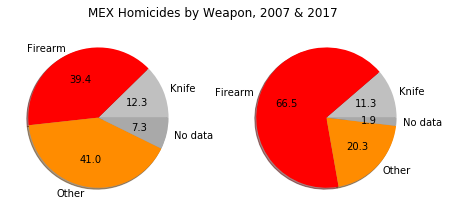

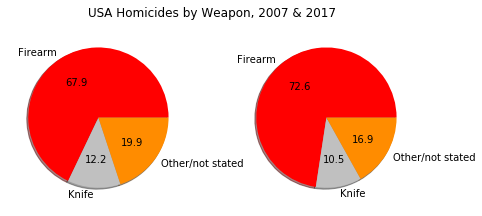

In [23]:
# MEX 2007 data to plot
label_mex = armas_headers[1:-1]

mex_2007 = timeline[0][1:-1]
mex_2017 = timeline[-1][1:-1]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'aspect':'equal'})
colors = ['silver', 'red', 'darkorange', 'darkgray']

# plot each pie chart in a separate subplot
ax1.pie(mex_2007, labels=label_mex, autopct='%.1f', colors=colors, shadow=True)
ax2.pie(mex_2017, labels=label_mex, autopct='%.1f', colors=colors, shadow=True)
# Adjust so nothing overlaps or is awkwardly far away
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3,top = 1.15)
# Give the two an appropriate title
fig.suptitle('MEX Homicides by Weapon, 2007 & 2017')

plt.show()

#USA 2007 data
label_usa = hom_headers[1:]
usa_2007 = [i[0] for i in hom_vals[1:]]
usa_2017 = [i[-1] for i in hom_vals[1:]]


# Same code with slight adjustments where appropriate
fig, (ax3, ax4) = plt.subplots(1, 2, subplot_kw={'aspect':'equal'})
colors = ['red', 'silver', 'darkorange', 'darkgray']

# plot each pie chart in a separate subplot
ax3.pie(usa_2007, labels=label_usa, autopct='%.1f', colors=colors, shadow=True)
ax4.pie(usa_2017, labels=label_usa, autopct='%.1f', colors=colors, shadow=True)
# Adjust so nothing overlaps or is awkwardly far away
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3,top = 1.15)
# Give the two an appropriate title
fig.suptitle('USA Homicides by Weapon, 2007 & 2017')

plt.show()

### The takeaway when comparing the United States with Mexico
What is interesting here is that we can directly see that the prevalence of firearms in homicide cases is much higher in the US than Mexico, though firearm use has risen in both. The rise in Mexico is particularly severe, though the US still managed to record a higher percentage. In Mexico, around 70% of the firearms were purchased in the United States legally yet smuggled across the border into Mexico, as reported by the [US Bureau of Alcohol, Tobacco, Firearms and Explosives](https://www.latimes.com/world/la-fg-mexico-guns-20180524-story.html). This means there is a pervasive and growing problem of weapons trafficking and smuggling that is only further fueling the violence in Mexico, which we can observe in these visualizations.

## _A Comparison of Homicides by Sex and Country_

In [24]:
import csv
with open("Total US Victim Data.csv") as us_data_f:
    us_victims = csv.reader(us_data_f)
    us_line_one = next(us_victims) # don't need the first line
    us_data = list(us_victims) # includes relevant headers, to be extracted as part of overall list

In [25]:
# Cleans the US data and removes extra spaces

for line in us_data:
    if '' in line:
        line.remove('')
for line in us_data:
    if '' in line:
        line.remove('')

In [26]:
# Assigns headers and the rest of the data

us_headers = us_data[0]
us_victim_data = us_data[1:]

In [27]:
import csv
with open("Total MEX Victim Data.csv") as mex_data_f:
    mex_victims = csv.reader(mex_data_f)
    mex_line_one = next(mex_victims)
    mex_data = list(mex_victims) 

In [28]:
# Extracts headers and relevant data from the Mexican CSV
# Only years 2000-2017 being used

mex_headers = mex_data[0]
mex_victim_data = [x for x in mex_data[11:]]

In [29]:
# This function converts all values to intergers and removes commas

def convert_and_replace(values):
    list_of_values = []
    for row in values:
        value = [int(v.replace(',','')) for v in row]
        list_of_values.append(value)
    return list_of_values

In [30]:
mex_victim_data = convert_and_replace(mex_victim_data)

In [31]:
us_victim_data = convert_and_replace(us_victim_data)

In [32]:
# This function is used to create a dictionary mapping values 
# to year and relevant headers

def dict_of_victims(headers, data):
    final_dict = {}
    for i, h in enumerate(headers):
        final_dict[h] = [row[i] for row in data]
    return final_dict

In [33]:
# Creates a dictionary of the US data

us_victims_dict = dict_of_victims(us_headers, us_victim_data)

In [34]:
# Creates a dictionary of the Mexican data

mex_victims_dict = dict_of_victims(mex_headers, mex_victim_data)

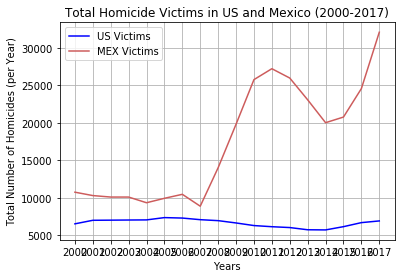

In [35]:
# Creates a line chart comparing Mexican and US victims per year

x_values = us_victims_dict['Year']
total_us_victims = us_victims_dict['Total']
total_mex_victims = mex_victims_dict['Total']

plt.title('Total Homicide Victims in US and Mexico (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)

plt.plot(x_values, total_us_victims, color='blue', label='US Victims')
plt.plot(x_values, total_mex_victims, color='indianred', label='MEX Victims')
plt.legend()
plt.show()

**Total Homicides:** Over the course of the entire time period (2000-2017) it is clear that Mexico has a much higher rate of homicides per year and that number is growing. This can be attributed mostly to gang violence as well as the fact that, in recent years, the United States has been fairly safe overall.

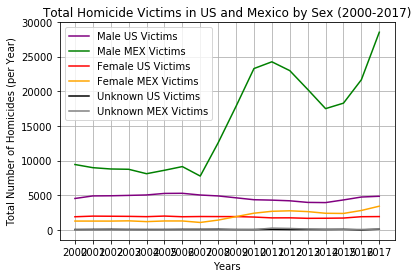

In [36]:
#Creates a line chart comparing Mexican and US victims' sex per year

x_values = us_victims_dict['Year']
male_us_victims = us_victims_dict['Male']
male_mex_victims = mex_victims_dict['Male']
female_us_victims = us_victims_dict['Female']
female_mex_victims = mex_victims_dict['Female']
unknown_us_victims = us_victims_dict['Unknown']
unknown_mex_victims = mex_victims_dict['Not Specified']

plt.title('Total Homicide Victims in US and Mexico by Sex (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)
plt.plot(x_values, male_us_victims, color='purple', label='Male US Victims')
plt.plot(x_values, male_mex_victims, color='g', label='Male MEX Victims')
plt.plot(x_values, female_us_victims, color='r', label='Female US Victims')
plt.plot(x_values, female_mex_victims, color='orange', label='Female MEX Victims')
plt.plot(x_values, unknown_us_victims, color='black', label='Unknown US Victims')
plt.plot(x_values, unknown_mex_victims, color='gray', label='Unknown MEX Victims')

plt.legend()
plt.show()

**Total Homicides by Sex:** With slight variances in all but one group, the total homicides by sex point to male deaths in Mexico being the largest and most volatile variable in the dataset. It also seems as though the sheer number of deaths in the male category has the biggest impact on the Mexican homicide trends as a whole.

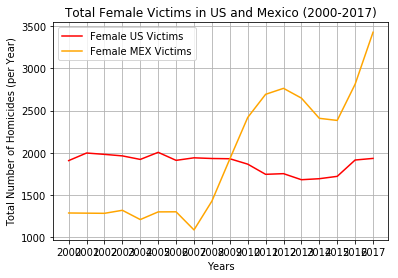

In [37]:
x_values = us_victims_dict['Year']
female_us_victims = us_victims_dict['Female']
female_mex_victims = mex_victims_dict['Female']


plt.title('Total Female Victims in US and Mexico (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)

plt.plot(x_values, female_us_victims, color='r', label='Female US Victims')
plt.plot(x_values, female_mex_victims, color='orange', label='Female MEX Victims')

plt.legend()
plt.show()

**Total Female Victims:** One of the biggest changes over time relative to the homicide numbers in 2000 was the number of female victims in Mexico. Towards the earlier part of the 21st century, we were actually seeing a great number of female deaths in the United States, this has changed in the time since. The number of female victims in Mexico have overtaken that of the United States at alarming rates, which can be seen above. 

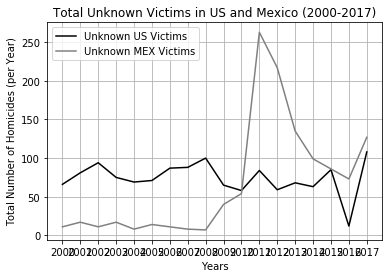

In [38]:
x_values = us_victims_dict['Year']
unknown_us_victims = us_victims_dict['Unknown']
unknown_mex_victims = mex_victims_dict['Not Specified']

plt.title('Total Unknown Victims in US and Mexico (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)
plt.plot(x_values, unknown_us_victims, color='black', label='Unknown US Victims')
plt.plot(x_values, unknown_mex_victims, color='gray', label='Unknown MEX Victims')

plt.legend()
plt.show()

**Total Unknown Victims:** These are the specific data points for which there was no known sex of the victim in question. Early in the 2000's, the United States had more victims who were unidentified relative to Mexico, but these numbers have since leveled off. There is a large peak in 2011 which could indicate many unsolved murders or underreporting by Mexican law enforcement agencies. 

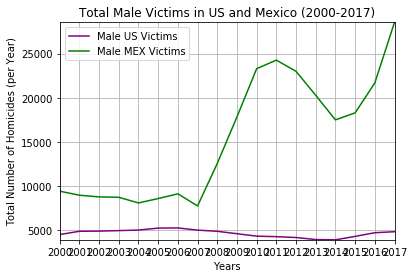

In [39]:
x_values = us_victims_dict['Year']
male_us_victims = us_victims_dict['Male']
male_mex_victims = mex_victims_dict['Male']


plt.title('Total Male Victims in US and Mexico (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)
plt.plot(x_values, male_us_victims, color='purple', label='Male US Victims')
plt.plot(x_values, male_mex_victims, color='g', label='Male MEX Victims')
plt.margins(0, 0)
plt.legend()
plt.show()

**Total Male Homicides by Country:** Gang and cartel violence in Mexico has insured that these numbers stay separated over the course of the last 18 years. The staggering increase in the numbers of male deaths is the largest outlier we have seen in this data set, which seems to be drawn from an uptick in gang violence. The United States have seen constant numbers in this category which implies that there has not been much change on the policy end to prevent more deaths. This negative consequence in the US is an indication that not much attention has been given by our government to slow the homicide related death toll. That being said, the Mexican government has an obligation to do something about these numbers as they are very concerning, espeicially looking at the last spike in deaths. 

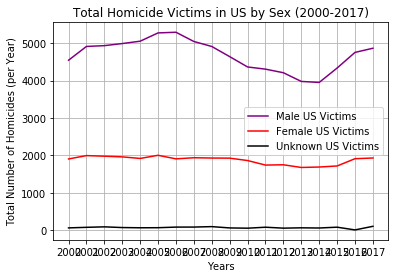

In [40]:
x_values = us_victims_dict['Year']
male_us_victims = us_victims_dict['Male']
female_us_victims = us_victims_dict['Female']
unknown_us_victims = us_victims_dict['Unknown']


plt.title('Total Homicide Victims in US by Sex (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)
plt.plot(x_values, male_us_victims, color='purple', label='Male US Victims')
plt.plot(x_values, female_us_victims, color='r', label='Female US Victims')
plt.plot(x_values, unknown_us_victims, color='black', label='Unknown US Victims')

plt.legend()
plt.show()

**Total United States Homicide Data:** The United States has seen a much steadier and more predictable path reagarding homicide numbers. From the years 2006-2013, the US saw a steady deacrease in male homicides, indicating that things were getting much safer. However, from 2013 to the present, those numbers have began to rise again. This could be a function of the after-effects of the 2008 housing crisis that drove many from their homes and into poverty.

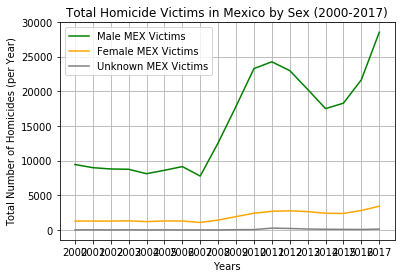

In [41]:
x_values = us_victims_dict['Year']
male_mex_victims = mex_victims_dict['Male']
female_mex_victims = mex_victims_dict['Female']
unknown_mex_victims = mex_victims_dict['Not Specified']


plt.title('Total Homicide Victims in Mexico by Sex (2000-2017)')
plt.xlabel('Years')
plt.ylabel('Total Number of Homicides (per Year)')
plt.xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.grid(True)
plt.plot(x_values, male_mex_victims, color='g', label='Male MEX Victims')
plt.plot(x_values, female_mex_victims, color='orange', label='Female MEX Victims')
plt.plot(x_values, unknown_mex_victims, color='gray', label='Unknown MEX Victims')

plt.legend()
plt.show()

**Total Mexican Homicide Data:** It can be seen that there is very little variance over time for both the unknown Mexican Victims and the Female Victims. However, the Male Victims have seen large increases overall in the 18 years analyzed here. The impact that this increase has on the overall victims is clear, which is why the Total Victims closely resembles that of the Male Victims. 

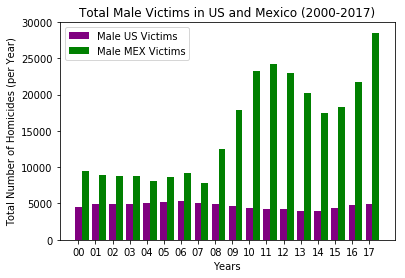

In [42]:
# Creates a bar chart comparing the totals for Male victims

ind = np.arange(len(male_us_victims))
width = 0.4
               
male_us_victims = us_victims_dict['Male']
male_mex_victims = mex_victims_dict['Male']

fig, ax = plt.subplots() 
USbar = ax.bar(ind, male_us_victims, width, color='purple', label='Male US Victims')
MEXbar = ax.bar(ind+width, male_mex_victims, width, color='g', label='Male MEX Victims')

ax.set_ylabel('Total Number of Homicides (per Year)')
ax.set_xlabel('Years')
ax.set_title('Total Male Victims in US and Mexico (2000-2017)')
ax.set_xticks(ind)
ax.set_xticklabels(('00','01','02','03','04','05','06','07','08','09', '10', '11', '12', '13', '14', '15', '16', '17'))
ax.legend()
plt.show()

**Male Victims by Country (revisited):** Our attention has been drawn especially to the numbers of male deaths in these two countries. In this bar graph, we look to more recent years (2009-2017). There has been, at times, slight decreases in numbers from the United States, but most years have been rather predictable. However, other than the period from 2012-2014, Mexican deaths have been rising steadily each year. There are many factors that could influence these numbers, but the main indicator is the increase in gang violence that directly correlates with the death toll on Mexican men. It is partly because of this cultural difference that the United States has far less homicides among males. It can also be seen here that the overall numbers closely resemble the male data, from which was can draw the conclusion that male deaths are the most prevalent in both countries, despite the differences in male numbers.